# Chapter 14: Regression Diagnostics and Structure

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Diagnostics

In [2]:
np.random.seed(987654321)
x = np.random.uniform(1,100, size=500)
y = 250 + x + np.random.normal(loc=0, scale=10, size=500)
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
reg1 = LinearRegression().fit(x,y)
reg1.intercept_, reg1.coef_

(array([249.11972778]), array([[1.04228808]]))

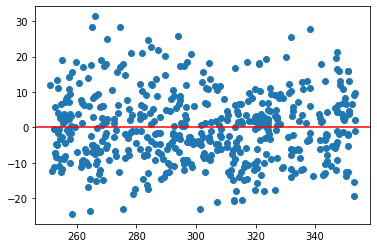

In [3]:
fitted_values = reg1.predict(x)
residuals = fitted_values - y

plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red')
plt.show()

## Heteroscedasticity

In [4]:
np.random.seed(987654321)
x = np.random.uniform(1,20, size=500)
y = 100 + 2*x + x*np.random.normal(size=500)
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
reg1 = LinearRegression().fit(x,y)
reg1.intercept_, reg1.coef_

(array([98.78478058]), array([[2.30388733]]))

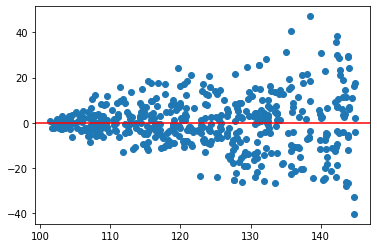

In [5]:
fitted_values = reg1.predict(x)
residuals = fitted_values - y

plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red')
plt.show()

In [6]:
cars = pd.read_csv("../data/cars.csv")

***logistic regression***

In [7]:
res2 = ols("dist ~ speed", data=cars).fit()

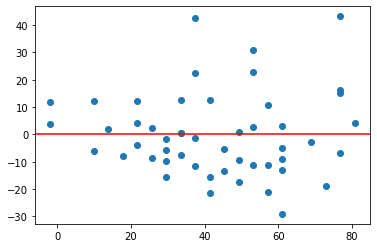

0.6510793807582509

In [8]:
plt.scatter(res2.fittedvalues, res2.resid)
plt.axhline(0, color='red')
plt.show()

res2.rsquared

In [9]:
res2.params

Intercept   -17.579095
speed         3.932409
dtype: float64

***Bresuch-Pagan test***

In [10]:
from statsmodels.compat import lzip

In [11]:
test = sm.stats.diagnostic.het_breuschpagan(res2.resid, res2.model.exog)
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
lzip(names, test)

[('Lagrange multiplier statistic', 3.214879927174641),
 ('p-value', 0.07297154505407806),
 ('f-value', 3.2983614504820826),
 ('f p-value', 0.07559716486053959)]